# Project 2 - Ames Housing Data and Kaggle Challenge

To objective of the project is to create a regression model based on the Ames Housing Dataset to predict the price of a house at sale.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses and their prices.

## Problem Statement

**To predict as accurately as possible the sale price of a house based on the Ames Housing Dataset using regression techniques enhanced by feature engineering and regularization.**<br>
**Additionally, the model should also help to perform inferential learning to provide homeowners with recommendation on the features that would fetch good sale price and those that would hurt the sale price.**<br>

### Summary of Contents

**1) Data Dictionary / Classification of Variables**<br>
**2) Data cleaning**<br>
**3) EDA**<br>
**4) Preprocessing & Feature Engineering**<br>
**5) Model, Predict & Evaluate**<br>
**6) Conclusion & Recommendations**<br>

In [2]:
## imports

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
## read csv datasets
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [4]:
#@ examining shapes & columns of the both test and train datasets
print("Shape of training set :" , train.shape)
print( train.columns)
print("Shape of testing set :" , test.shape)
print( train.columns)

Shape of training set : (2051, 81)
Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garag

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Classifying variables
**Continuous variables:**    
    - Lot Frontage
    - Lot Area
    - Mas Vnr Area
    - BsmtFin SF 1 
    - BsmtFin SF 2             
    - Bsmt Unf SF      
    - Total Bsmt SF
    - 1st Flr SF 
    - 2nd Flr SF 
    - Low Qual Fin SF 
    - Gr Liv Area      
    - Garage Area
    - Wood Deck SF    
    - Open Porch SF  
    - Enclosed Porch   
    - 3Ssn Porch     
    - Screen Porch   
    - Pool Area 
    - Misc Val 
    - Sale Price
    
**Discrete variables :**
    - Mo Sold 
    - Yr Sold 
    - Garage Yr Blt
    - Year Built  
    - Year Remod/Add
    - Bsmt Full Bath 
    - Bsmt Half Bath 
    - Full Bath 
    - Half Bath
    - Bedroom AbvGr 
    - Kitchen AbvGr
    - TotRms AbvGrd
    - Fireplaces
    - Garage Cars
    
**Nominal variables :**
    - MS SubClass  
    - MS Zoning 
    - Street 
    - Alley
    - Land Contour  
    - Lot Config
    - Neighborhood 
    - Condition 1 
    - Condition 2 
    - Bldg Type
    - House Style 
    - Roof Style 
    - Roof Matl
    - Exterior 1st 
    - Exterior 2nd 
    - Mas Vnr Type
    - Foundation
    - Heating
    - Central Air 
    
**Ordinal variables :**
    - Lot Shape  
    - Utilities
    - Land Slope
    - Overall Qual
    - Overall Cond  
    - Exter Qual 
    - Exter Cond
    - Bsmt Qual
    - Bsmt Cond
    - Bsmt Exposure
    - BsmtFin Type 1
    - BsmtFinType 2
    - HeatingQC
    - Electrical
    - Kitchen Qual
    - Functional
    - FireplaceQu
    - Garage Finish
    - Garage Qual
    - Garage Cond
    - Paved Drive
    - Pool QC
    - Fence

### Data cleaning

***For both datasets - train and test:***<br>

**1) Check for column names across the 2 datasets to ensure they are the same**<br>

**2) Rename columns**<br>

**3) Check datatypes of columns using .info()**
   - Data types for every column looks correct with the decription of the column for both test and train data set<br>

**4) Find columns with null values**
   - Drop off columns with huge number of null values i.e. more than 250 cell values after checking their correlation to sale price<br>
       - Columns falling into this category are : Lot Frontage, Alley, FireplaceQu, Pool Qc, Misc Features, Fence
   - Replace cell values with less that 250 cells with null values : 0 for numeric and NA for categorical columns

**5) Find columns related to other existing columns** 
   - There are also some derived columns who value is based on other existing columns. 
       - 1 such columns was identified : Total Bsmt SF 
       - It's dependant columns were dropped

In [6]:
# renaming columns in both datasets
train.columns = train.columns.map(lambda x: x.replace(' ', '_'))
train.columns = train.columns.map(lambda x: x.lower())

test.columns = test.columns.map(lambda x: x.replace(' ', '_'))
test.columns = test.columns.map(lambda x: x.lower())

In [7]:
train.columns.sort_values()

Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr',
       'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath',
       'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air',
       'condition_1', 'condition_2', 'electrical', 'enclosed_porch',
       'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence',
       'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional',
       'garage_area', 'garage_cars', 'garage_cond', 'garage_finish',
       'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area',
       'half_bath', 'heating', 'heating_qc', 'house_style', 'id',
       'kitchen_abvgr', 'kitchen_qual', 'land_contour', 'land_slope',
       'lot_area', 'lot_config', 'lot_frontage', 'lot_shape',
       'low_qual_fin_sf', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature',
       'misc_val', 'mo_sold', 'ms_subclass', 'ms_zoning', 'neighborhood',
       

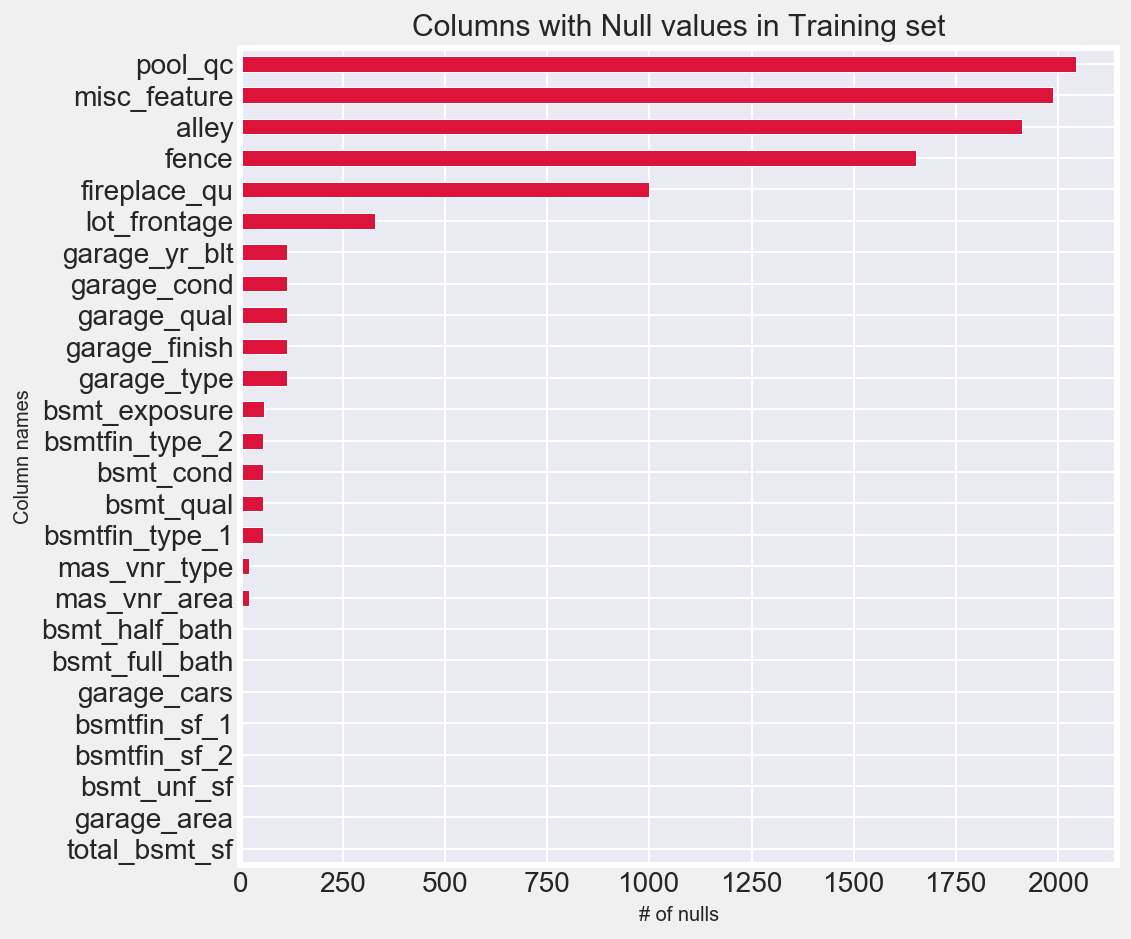

In [8]:
## bar plot to identify columns and quantum of null values in these columns in training dataset
plt.figure(figsize = (7,7))
sns.set_style("darkgrid")
missing_col = train.isnull().sum()
missing_col = missing_col[missing_col >0 ]
missing_col.sort_values(ascending= True).plot(kind= 'barh', color = 'crimson')
plt.title('Columns with Null values in Training set', fontsize = 15)
plt.xlabel('# of nulls', fontsize = 10)
plt.ylabel('Column names', fontsize = 10);

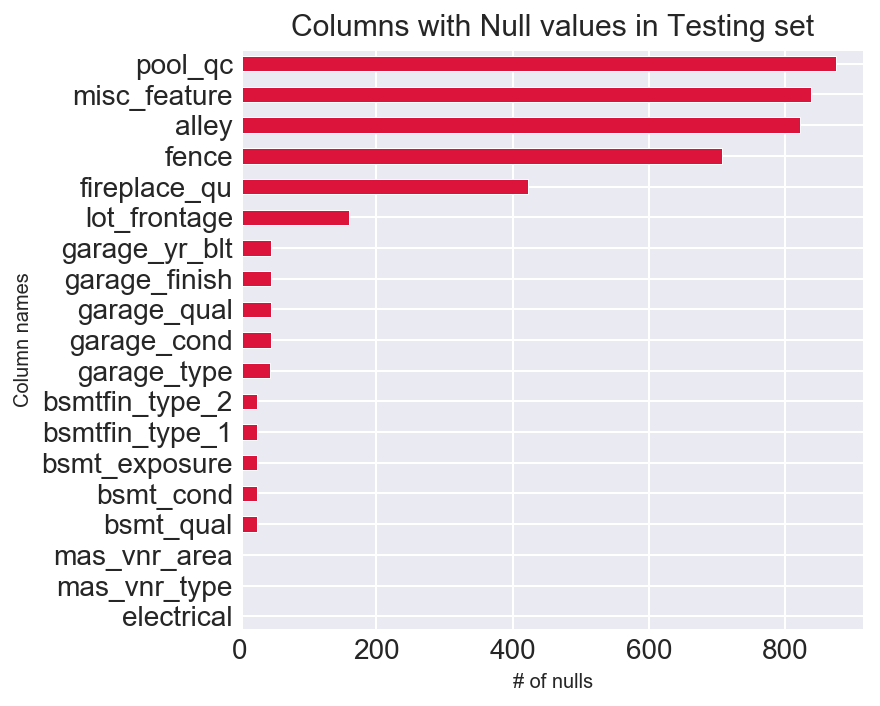

In [9]:
## bar plot to identify columns and quantum of null values in these columns in testing dataset
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
missing_col = test.isnull().sum()
missing_col = missing_col[missing_col >0 ]
missing_col.sort_values(ascending = True).plot(kind= 'barh', color = 'crimson')
plt.title('Columns with Null values in Testing set', fontsize = 15)
plt.xlabel('# of nulls', fontsize = 10)
plt.ylabel('Column names', fontsize = 10);

In [10]:
# remove columns with high null values - >more than 250 null values in both train and test dfs after checking their 
# correlation to Sale Price
train = train.drop(["lot_frontage","alley","fireplace_qu","misc_feature","pool_qc","fence"], axis = 1)
test = test.drop(["lot_frontage","alley","fireplace_qu","misc_feature","pool_qc","fence"], axis = 1)

In [11]:
# define function to replace null values
def replaceNA_in_df (df, column, replace_val):
    for col in column:  ## for every column
        df[col] = df[col].fillna(replace_val) ## replace null values with value to replace indicated during function call

In [12]:
# replace null values with 0 for numerical columns and NA for categorical columns in training data set
num_var = [col for col in train.columns if train[col].dtypes != 'object'] ## numeric columns
cat_var = [col for col in train.columns if train[col].dtypes == 'object'] ## categorical columns
replaceNA_in_df(train, num_var, 0)  ## call replace function defined above for numeric columns
replaceNA_in_df(train, cat_var, 'NA') ## call replace function defined above for categoric columns

In [13]:
# replace null values with 0 for numerical columns and NA for categorical columns in test data set
num_var_test = [col for col in test.columns if test[col].dtypes != 'object'] ## numeric columns
cat_var_test = [col for col in test.columns if test[col].dtypes == 'object'] ## categorical columns
replaceNA_in_df(test, num_var_test, 0) ## call replace function defined above for numeric columns
replaceNA_in_df(test, cat_var_test, 'NA') ## call replace function defined above for categoric columns

In [14]:
# identifying derived continuous variables from an existing one and dropping non derived columns
# columns to be kept indicated below - rest are to be dropped
# 'Total Bsmt SF'
# train[['BsmtFin SF 1', 'BsmtFin SF 2',
#        'Bsmt Unf SF', 'Total Bsmt SF']]

# 'Gr Liv Area'
# train[['Gr Liv Area', '1st Flr SF','2nd Flr SF']]

train.drop(['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf'], axis = 1, inplace = True)
train.drop(['1st_flr_sf', '2nd_flr_sf'], axis = 1, inplace = True)

test.drop(['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf'], axis = 1, inplace = True)
test.drop(['1st_flr_sf', '2nd_flr_sf'], axis = 1, inplace = True)
print(test.shape)

(879, 69)


### EDA

***Descriptive analysis follows the specific plots***<br>

1) Coorelation heatmap to indentify key variables correlated to Sale Price as well as collinearity between variables. <br>

2) For variables with high correlation to target variable, examine their relationship with target variable using pair plot.<br>

3) Using the same paiplot, identified couple of outliers for columns - Gr Living Area, Lot Area and Tot Bsmt SqFt.
<br>

4) Further inspect outliers with box plot and make necessary corrections.<br>

5) Used Seaborn Facetplot to inspect distribution of all numeric columns in the training dataset.<br>

6) Additional data exploration plots to inspect further relationship between indentified features and its impact on sales price as well as collinearity.<br>

7) Sale Price does not follow a normal distribution. It is right skewed. For the regressors to work better, the data shouldn't be sparsely distributed. Thus, normalized Sale Price using a log function. 


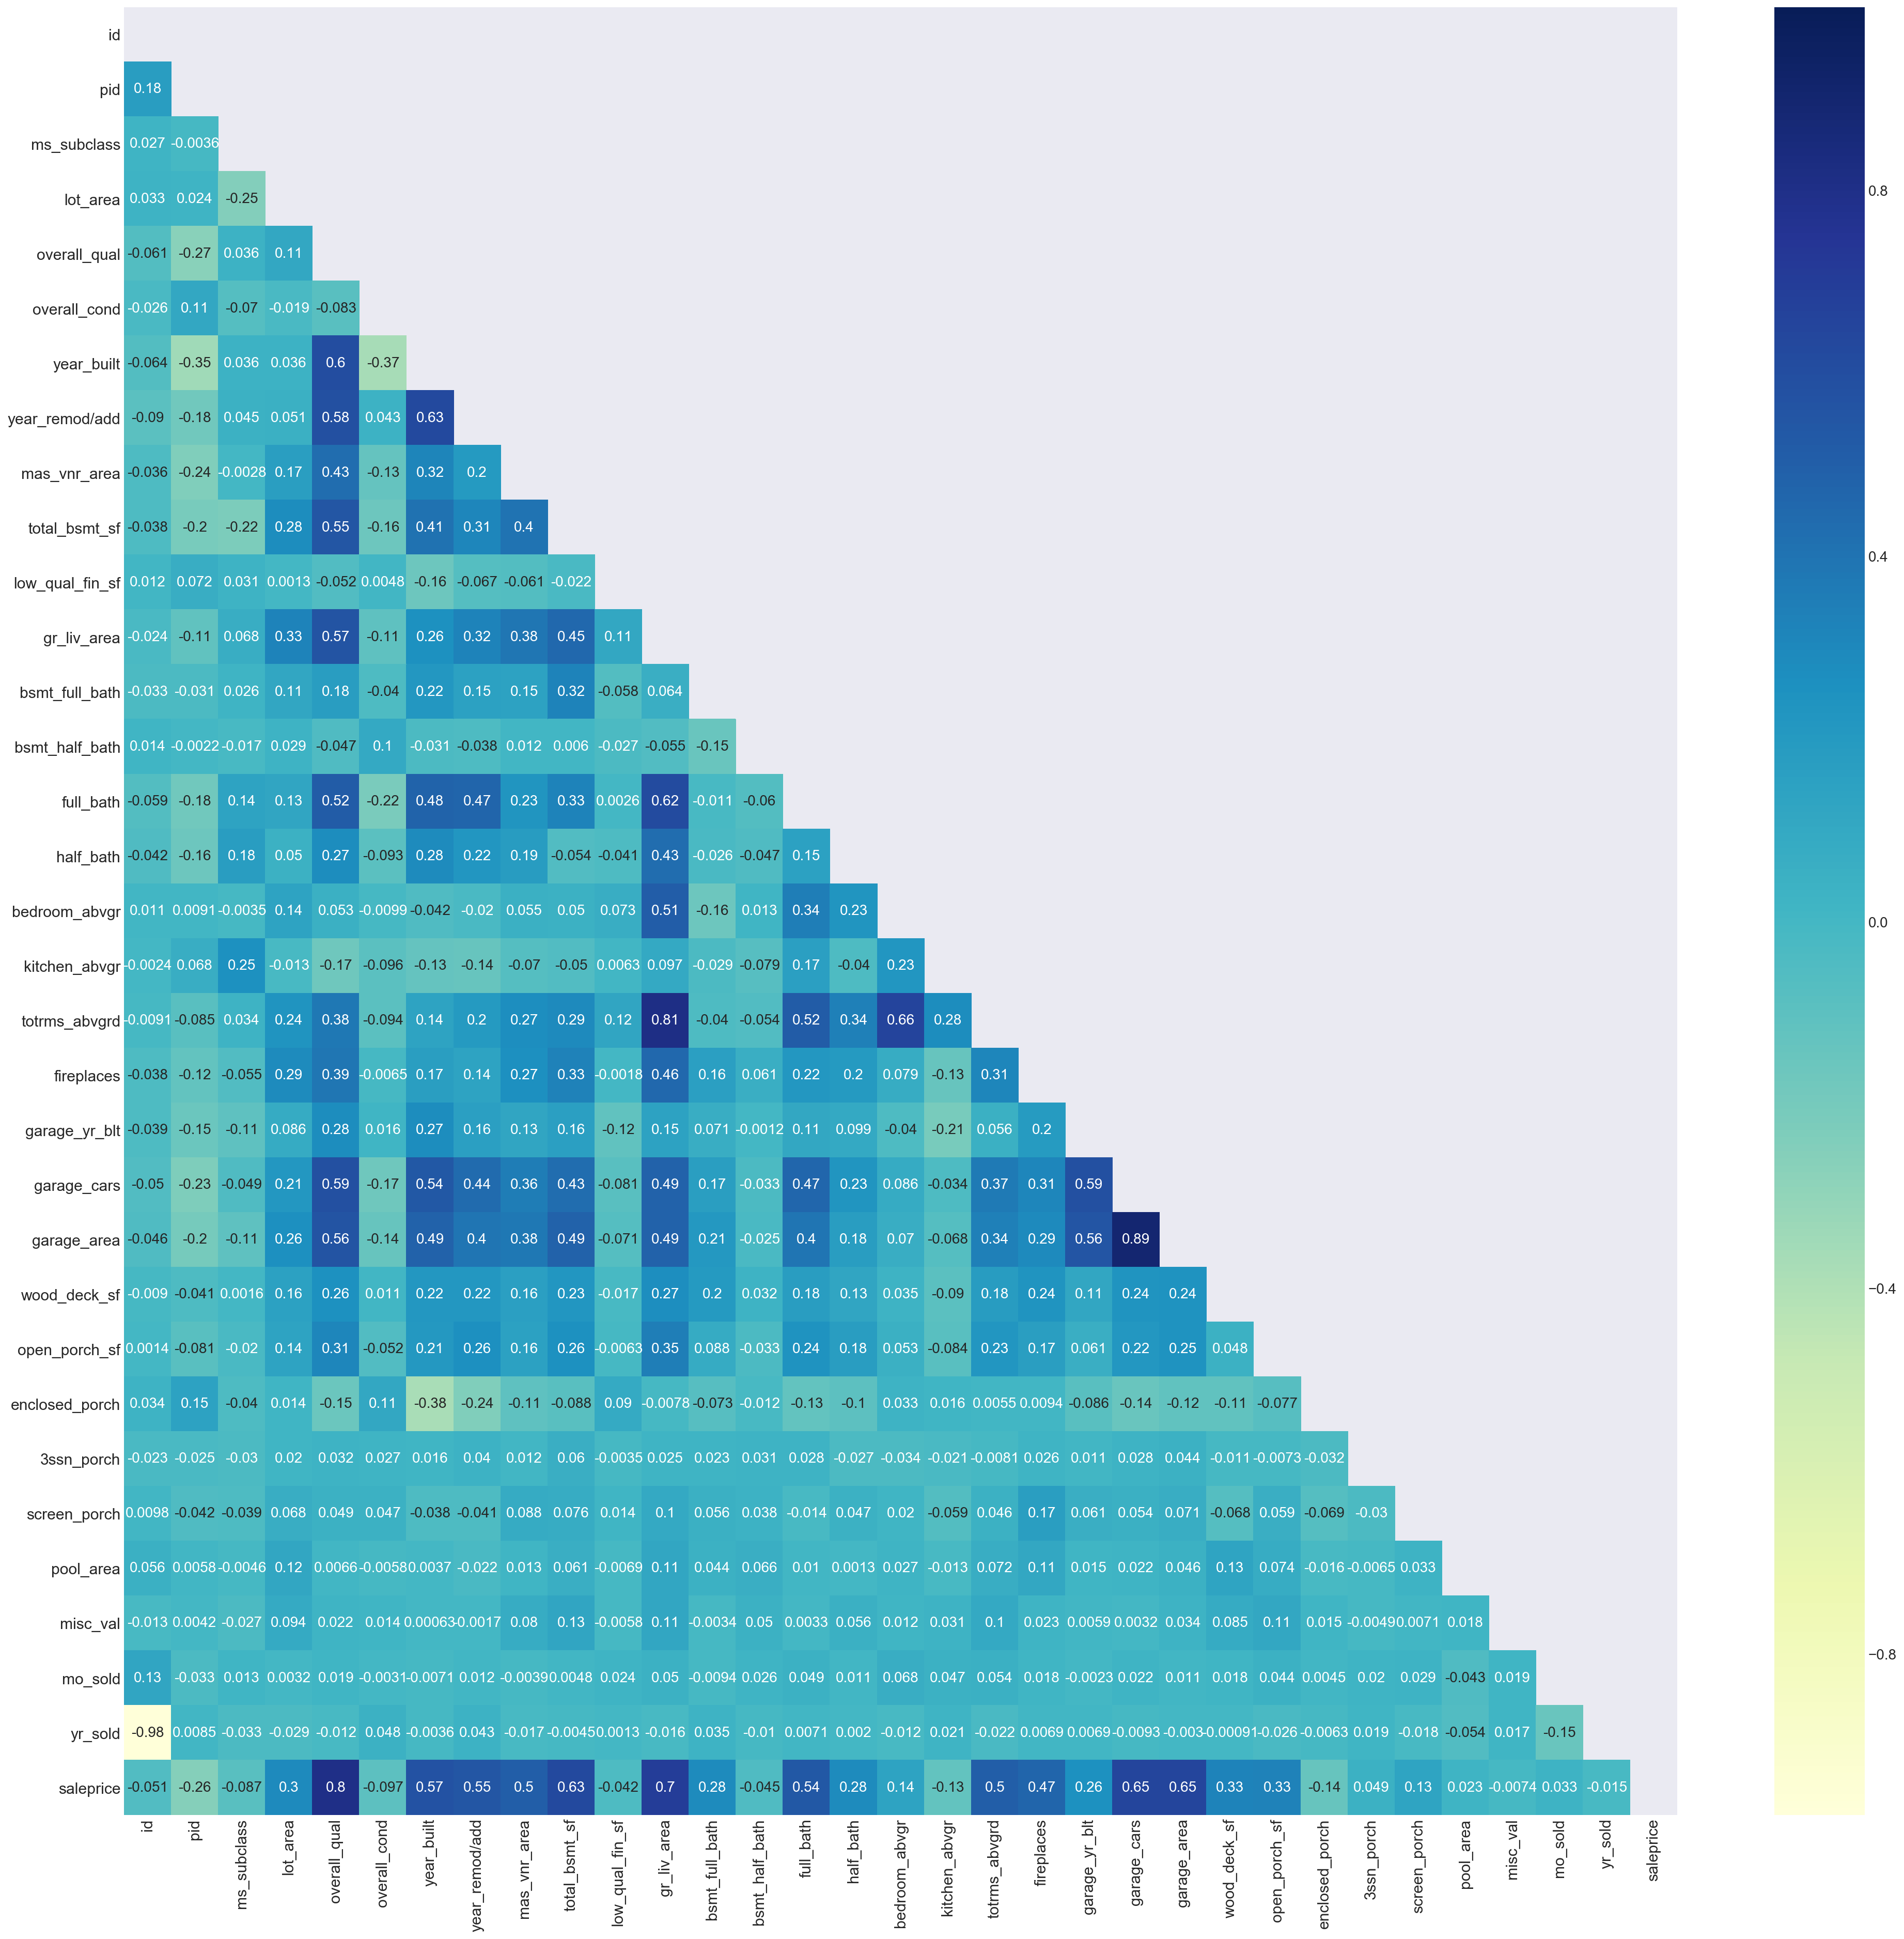

In [15]:
## inspecting correlation via heatmap to identify feature variables 
fix, ax = plt.subplots(figsize=(30,30))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), mask = mask, ax= ax, annot = True ,cmap = 'YlGnBu');

#adjusting size of ticklabels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15);


In [16]:
# displaying features with highest correlation to sale price column - Overall quality columns appears to have 
# the highest correlation. 
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["saleprice"], ascending = False, inplace = True)
print(corr.saleprice)

Find most important features relative to target
saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.649897
garage_cars        0.647781
total_bsmt_sf      0.629303
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
totrms_abvgrd      0.504014
mas_vnr_area       0.503579
fireplaces         0.471093
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283332
half_bath          0.283001
garage_yr_blt      0.258645
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045290
id                -0.051398
ms_subclass       -0.087335
overall_cond      -0.097019
kitchen_abvgr     -0.125444
enclosed_porch    -0.135656
pid               -0.255052
Name: saleprice, dtype: floa

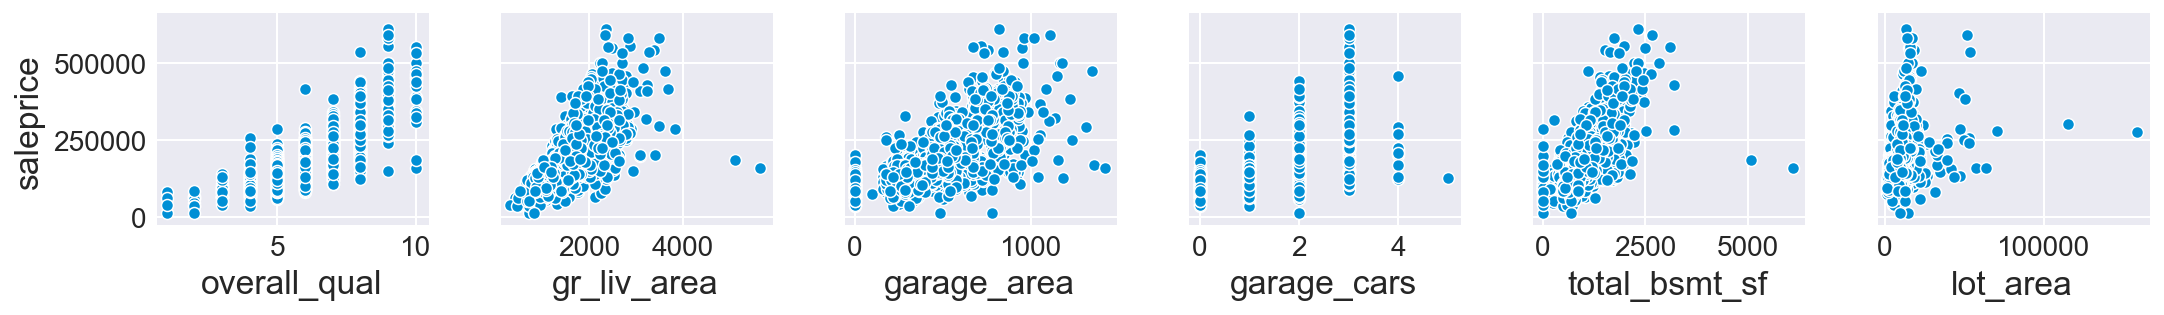

In [17]:
# use pairplot to check linearity of top numeric variables with saleprice - helped to identify outliers too
sns.pairplot(train,
             x_vars = ['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','lot_area'],
             y_vars = ['saleprice']);

#### Finding outliers

Text(0, 0.5, 'Sale Price')

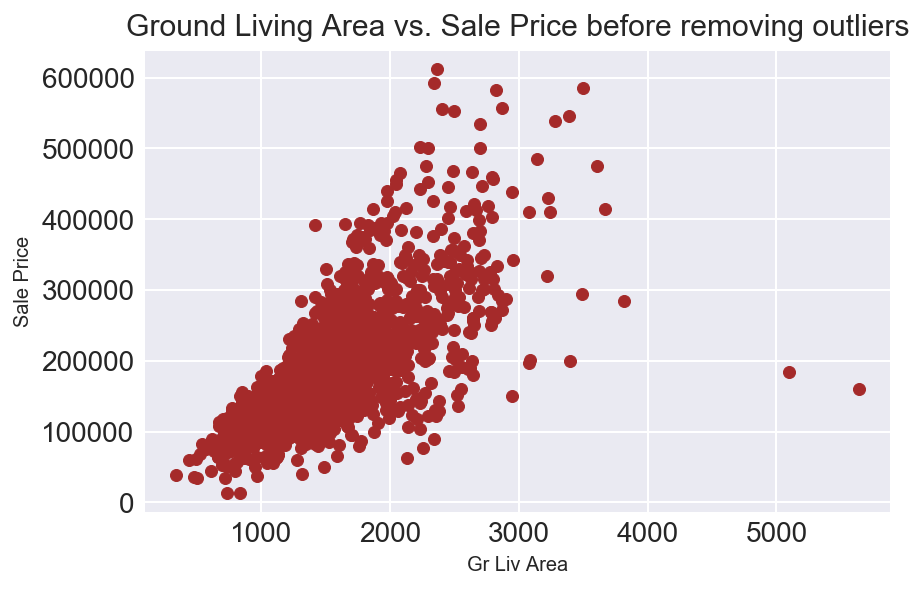

In [18]:
## inspecting with a scatter plot of sale price with ground liv area to look for outliers after identified from above
sns.set_style('darkgrid')
plt.scatter(train["gr_liv_area"], train["saleprice"], color = 'brown');
plt.title("Ground Living Area vs. Sale Price before removing outliers",  fontsize = 15)
plt.xlabel('Gr Liv Area', fontsize = 10)
plt.ylabel('Sale Price', fontsize = 10)

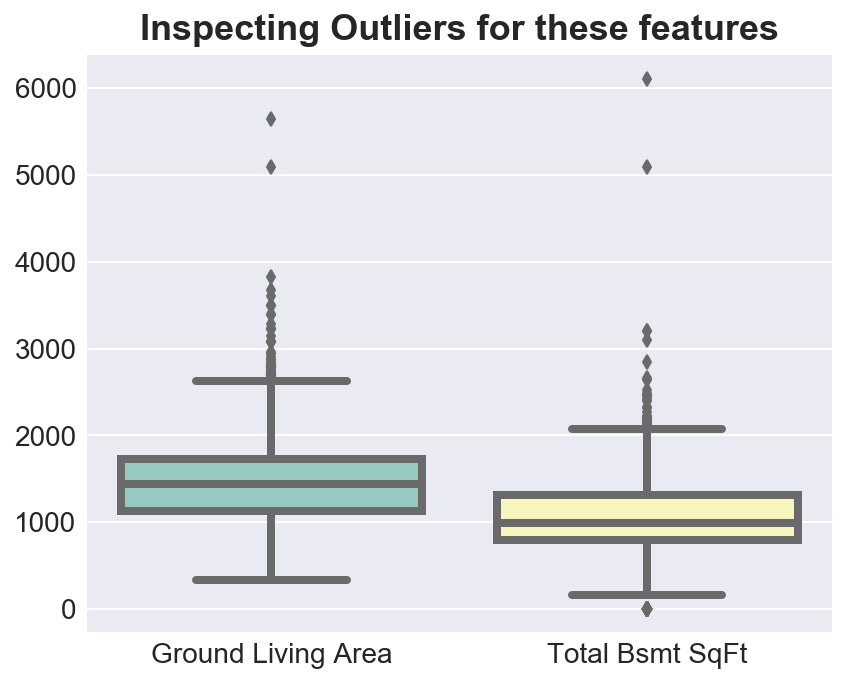

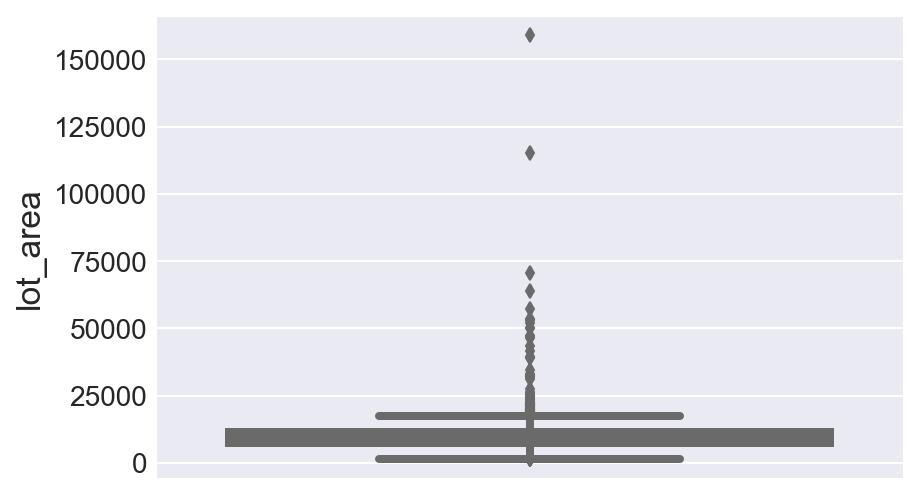

In [19]:
variables = train.loc[:,['gr_liv_area','total_bsmt_sf']]
variables = variables.rename(columns={'gr_liv_area':'Ground Living Area','total_bsmt_sf':'Total Bsmt SqFt'})
plt.figure(figsize=(6,5))
plt.title('Inspecting Outliers for these features', size = 18, weight = 'bold')
sns.boxplot(data=variables,orient='v',palette='Set3');
plt.show()
sns.boxplot(x=train['lot_area'], orient = 'v',palette='Set3' )
plt.show()

In [20]:
## removing the 2 outliers with Living area > 5000 and very low sale price
train = train[train['gr_liv_area']<5000]

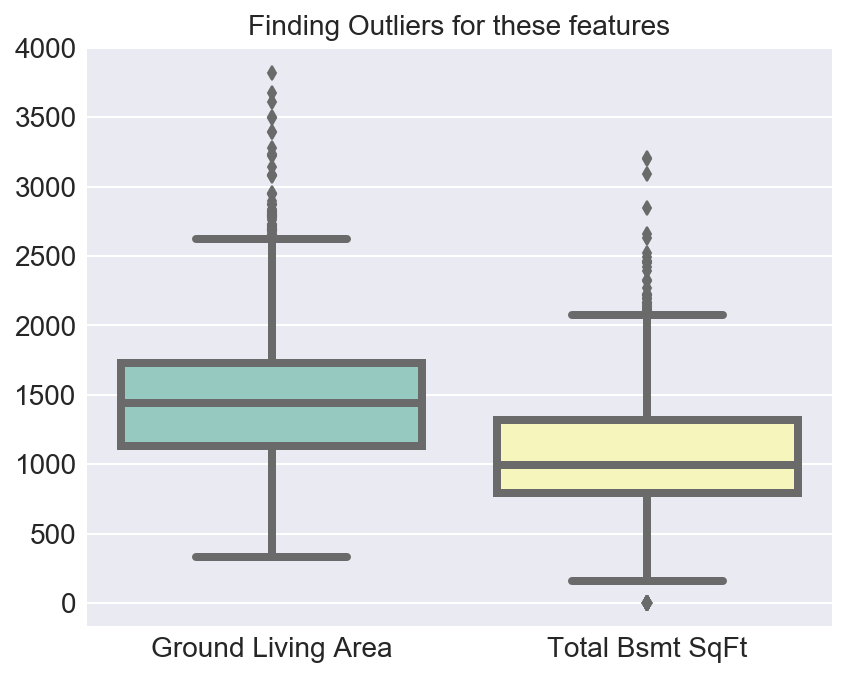

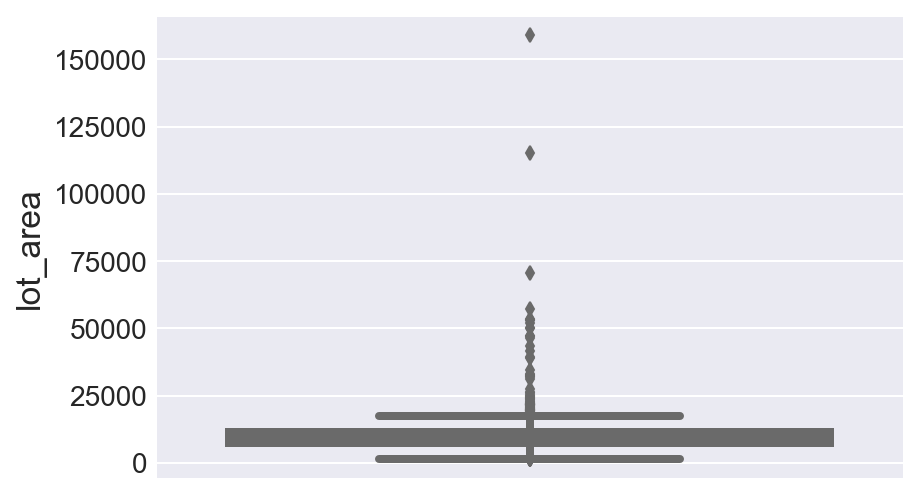

In [21]:
# plotting the same box plots above to check after removal of grounf living area outliers. 
# The removal helped remove outler for Basement Sqft as well.
variables = train.loc[:,['gr_liv_area','total_bsmt_sf']]
variables = variables.rename(columns={'gr_liv_area':'Ground Living Area','total_bsmt_sf':'Total Bsmt SqFt'})
plt.figure(figsize=(6,5))
plt.title('Finding Outliers for these features', size = 14)
sns.boxplot(data=variables,orient='v',palette='Set3');
plt.show()
sns.boxplot(x=train['lot_area'], orient = 'v',palette='Set3' )
plt.show()

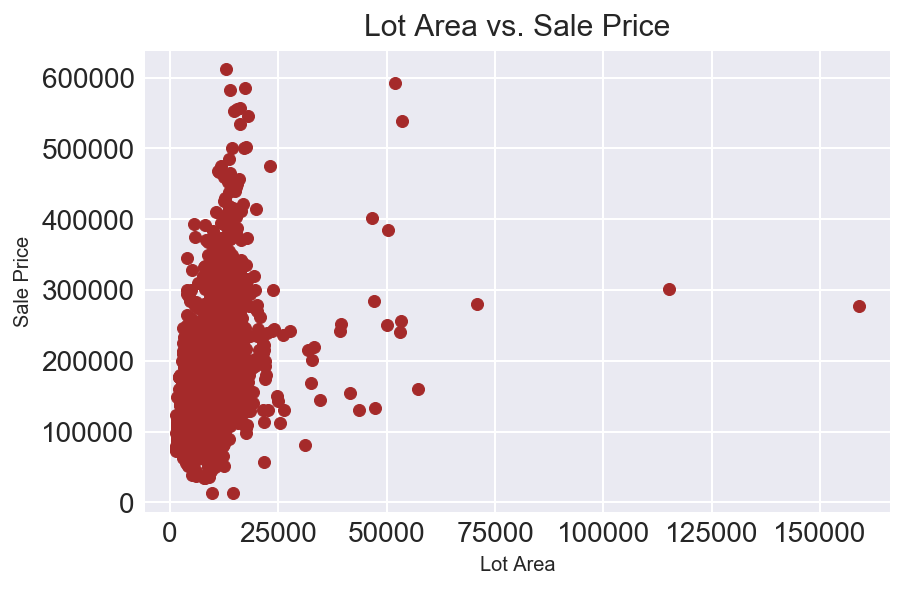

In [22]:
## scatter plot to see correlation of lot area to sale price to look for outliers
plt.scatter(train["lot_area"], train["saleprice"], color = 'brown')
plt.title("Lot Area vs. Sale Price",  fontsize = 15)
plt.xlabel('Lot Area', fontsize = 10)
plt.ylabel('Sale Price', fontsize = 10);

# the 2 records with >100,000 lot area but no significant impact to sale price seem to be pure outliers and are 
# to be removed

In [23]:
## removing the 2 outliers with Lot area > 100,000 and very low sale price
train = train[train['lot_area']<100000]

### Inspecting the distribution of variables in training dataset

In [1]:
## using pd.melt to pivot the table into values by each variable 
## <ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html>
num_var = [col for col in train.columns if train[col].dtypes != 'object'] 
facetgrid = pd.melt(train, value_vars=num_var)
sns.set_style("darkgrid")
## displaying the distribution of all numeric variables with a seaborn facetgrid 
ax = sns.FacetGrid(facetgrid, col="variable",  col_wrap=4, sharex=False, sharey=False, palette = 'hus1', 
                   margin_titles = True);
ax = ax.map(sns.distplot, "value", label = 'small') # distplot for the kdeline over histograms
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribution of Numeric Features', size = 18, weight = 'bold');

NameError: name 'train' is not defined

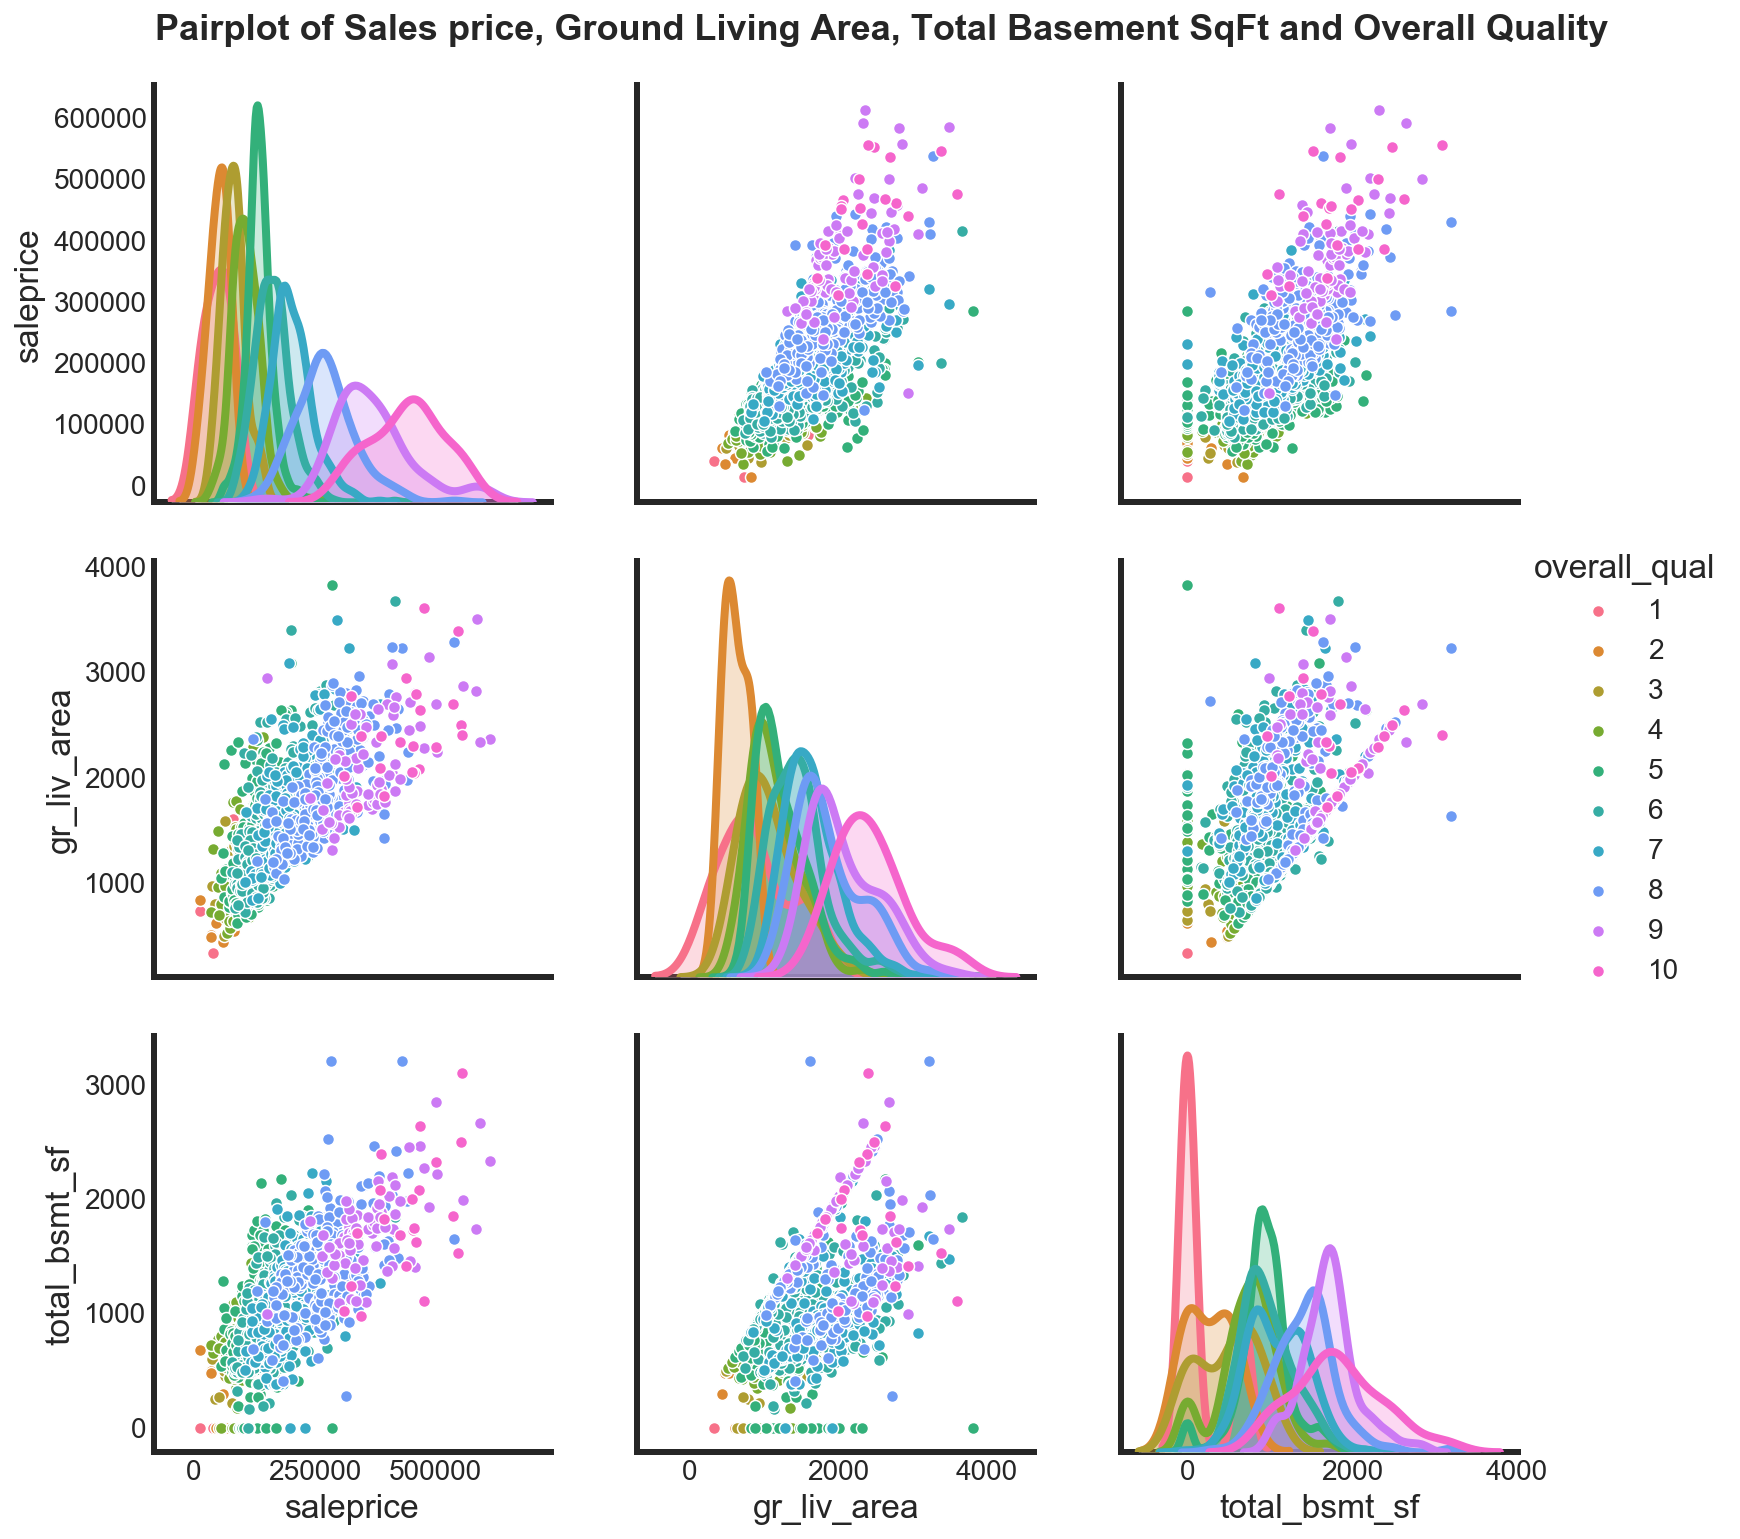

In [25]:
## pairplot to identify relationship between identified variables (total 4 at once) against each other
# to note the colinearity of gr living area and bsmt sq ft variable
np.seterr(divide='ignore', invalid='ignore') ## to remove warning related to pairplot 
def pair_plot(df):
    sns.set_style('white')
    pairplot = sns.pairplot(train,vars = ['saleprice','gr_liv_area','total_bsmt_sf'], hue = 'overall_qual',
                            palette = 'husl' ,height = 3.5);

    pairplot.fig.suptitle("Pairplot of Sales price, Ground Living Area, Total Basement SqFt and Overall Quality",
                          size = 18, y = 1.02, weight = 'bold')  
    plt.show();
    
pair_plot(train)

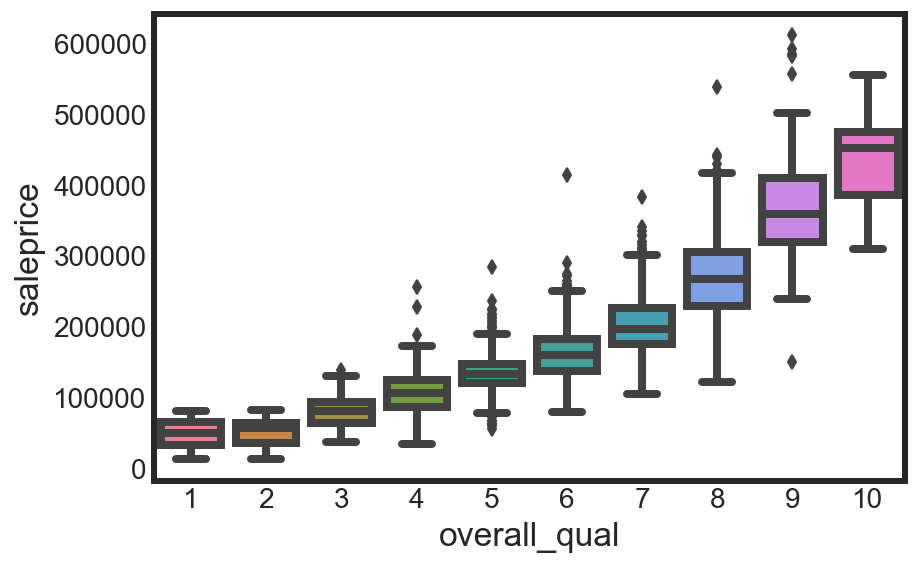

In [26]:
# clear indication of overall_qual feature impacting sale price
sns.boxplot(train['overall_qual'], train['saleprice'],palette='husl');

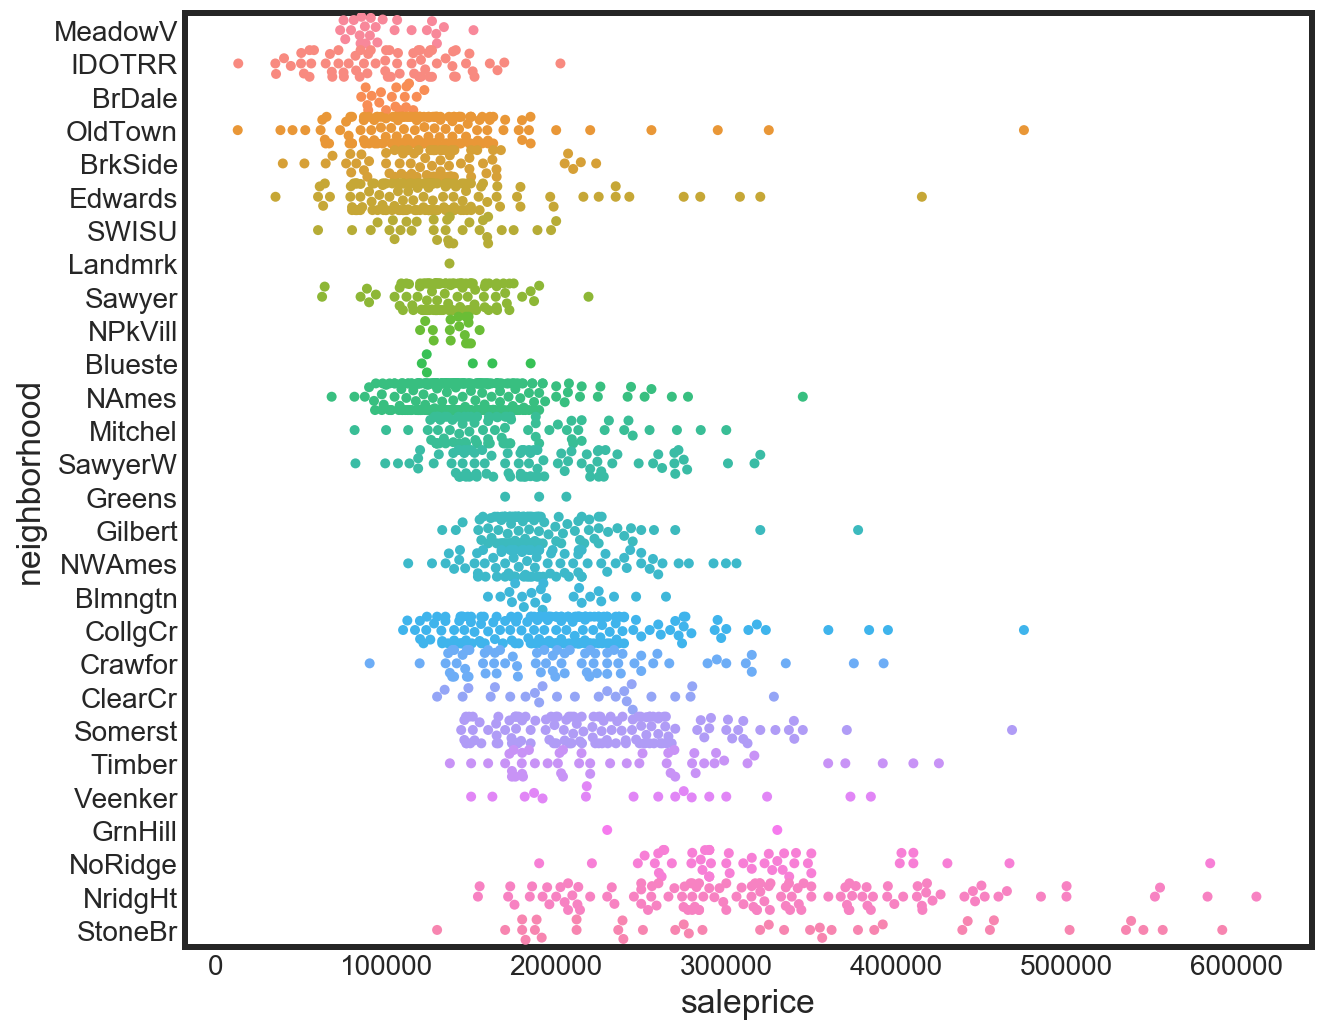

In [27]:
# exploring swarm plot to identify neighborhoods that impact sale price positively
# plotted after taking the mean of sale price by neighborhood
fig_dims = (9, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sorted_nb = train.groupby(['neighborhood'])['saleprice'].mean().sort_values()
sns.swarmplot(x=train['saleprice'], y=train['neighborhood'], order=list(sorted_nb.index) ,ax = ax, orient = 'h');
plt.show()

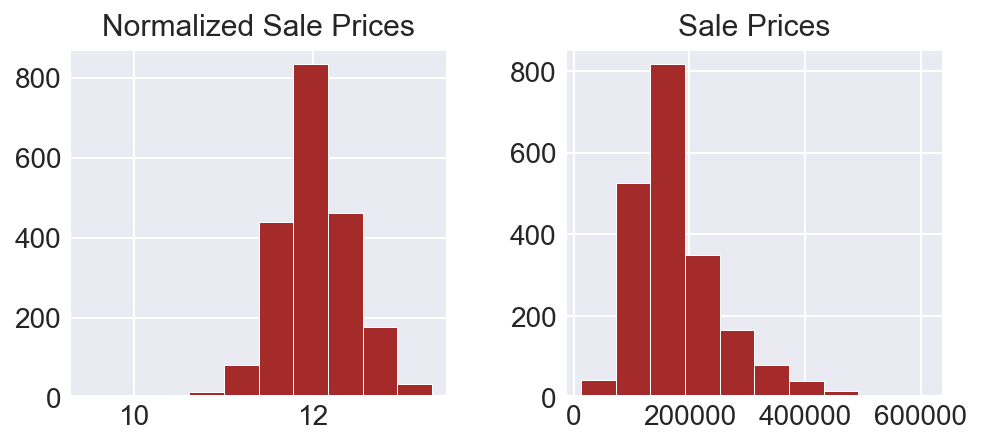

In [28]:
## its evident from the above that Sale Price do not follow a normal distribution. It is right skewed. 
## For the regressors to work better, the data shouldn't be sparsely distributed. 
## Taking the log function to normalize in this instance. 
sns.set_style('darkgrid')
norm_saleprice = np.log(train['saleprice'])
pre_n_post_sale_price = pd.DataFrame({'Normalized Sale Prices':norm_saleprice, 'Sale Prices': train["saleprice"]})
fig = pre_n_post_sale_price.hist(figsize = [7,3],color = 'brown');

## adjusting the size of title
[x.title.set_size(15) for x in fig.ravel()]  
train.saleprice = norm_saleprice

In [29]:
train.shape

(2047, 70)

In [30]:
# saving the cleaned dataframes to csv for efficiency sake
train.to_csv('datasets/train_cleaned.csv', index=False)
test.to_csv('datasets/test_cleaned.csv', index=False)

### Preprocessing & Feature Engineering

1) Combined cleaned version of both training and testing data set to a single data frame<br>

2) Replaced ordinal variables' values with integer ranking<br>

3) Identified categorical columns and created dummy variables for the same<br>

4) Split this dataset back into training and test set prior to preprocessing<br>

5) Performed train-test-split with 90% training data<br>

6) Scaled the split training sets (X_train and y_train)<br>

In [31]:
# reading from cleaned and saved csv for efficiency in re-running the code when needed
train_c = pd.read_csv('datasets/train_cleaned.csv',  keep_default_na=False)
test_c = pd.read_csv('datasets/test_cleaned.csv', keep_default_na=False)

In [32]:
print(test_c.shape)
print(train_c.shape)

(879, 69)
(2047, 70)


In [33]:
## combined train and test datasets to a single df for efficiency in feature engineering
df_combined = pd.concat([train_c, test_c], sort = False )
df_combined.shape
# df_combined.info()

(2926, 70)

In [34]:
# converting ordinal columns with type object to int by assigning ranks. Using single mapper for all ordinal variables with 6 codes
ordinal_mapper6 = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4,'Ex': 5 }
df_combined['exter_qual'] = df_combined['exter_qual'].map(ordinal_mapper6)
df_combined['exter_cond'] = df_combined['exter_cond'].map(ordinal_mapper6)
df_combined['bsmt_qual'] = df_combined['bsmt_qual'].map(ordinal_mapper6)
df_combined['bsmt_cond'] = df_combined['bsmt_cond'].map(ordinal_mapper6)
df_combined['garage_qual'] = df_combined['garage_qual'].map(ordinal_mapper6)
df_combined['garage_cond'] = df_combined['garage_cond'].map(ordinal_mapper6)
df_combined['heating_qc'] = df_combined['heating_qc'].map(ordinal_mapper6)
df_combined['kitchen_qual'] = df_combined['kitchen_qual'].map(ordinal_mapper6)

In [35]:
ordinal_mapper8 = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3,'Mod': 4,'Min2': 5, 'Min1': 6 ,'Typ': 7 }
df_combined['functional'] = df_combined['functional'].map(ordinal_mapper8)

In [36]:
df_combined['bsmt_exposure'] = df_combined['bsmt_exposure'].map({'NA': 0,'No': 1,'Mn': 2, 'Av' : 3, 'Gd': 4})

In [37]:
df_combined['garage_type'] = df_combined['garage_type'].map({'NA': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3,  
                                                             'Basment': 4,'Attchd': 5,'2Types': 6})
df_combined['garage_finish'] = df_combined['garage_finish'].map({'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})

In [38]:
df_combined['central_air'] = df_combined['central_air'].map({'N': 0,'Y': 1})
df_combined['paved_drive'] = df_combined['paved_drive'].map({'N': 1,'P': 2,'Y': 3})

In [39]:
df_combined['bsmt_exposure'].unique()

array([1, 4, 3, 0, 2])

In [40]:
# after converting ordinal variables, checking out total catergorical columns
cat_var = [col for col in df_combined.columns if df_combined[col].dtypes == 'object'] 
cat_var

['ms_zoning',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'electrical',
 'sale_type']

#### Dummy for categorical variables

In [41]:
# creating dummy variables for the rest of categorical columns resulting in a total of 204 variables  
df_combined_dummy = pd.get_dummies(df_combined, columns = cat_var, drop_first = True)

df_combined_dummy.shape
# df_combined_dummy.head()

(2926, 204)

In [42]:
# preparing rows for creating a dataframe to split train and test to original dataframes
rows = df_combined_dummy.loc[:, ~df_combined_dummy.columns.isin(['id','pid','saleprice'])]

In [43]:
# creating a dataframe to split train and test to original dataframes
cols = df_combined_dummy.columns[~df_combined_dummy.columns.isin(['id','pid','saleprice'])]
data = pd.DataFrame(rows, columns = cols)
data.shape

(2926, 201)

In [44]:
data['id'] = df_combined_dummy['id'].tolist()
data['saleprice'] = df_combined_dummy['saleprice'].tolist()

In [45]:
data.shape

(2926, 203)

In [46]:
# inspecting row indices to confirm them before splitting train and test. 
# train and test identified based on the value of sale price where it is null for test set. 
data.iloc[0:2047,:]
# data.iloc[2047:,:]

ms_subclass  lot_area  overall_qual  overall_cond  year_built  \
0              60     13517             6             8        1976   
1              60     11492             7             5        1996   
2              20      7922             5             7        1953   
3              60      9802             5             5        2006   
4              50     14235             6             8        1900   
...           ...       ...           ...           ...         ...   
2042           20     11449             8             5        2007   
2043           30     12342             4             5        1940   
2044           50      7558             6             6        1928   
2045           20     10400             4             5        1956   
2046           60      7500             7             5        1999   

      year_remod/add  mas_vnr_area  exter_qual  exter_cond  bsmt_qual  ...  \
0               2005         289.0           4           3          3  ...   
1               1997         132.0           4           3          4  ...   
2               2007           0.0           3           4          3  ...   
3               2007           0.0           3           3          4  ...   
4               1993           0.0           3           3          2  ...   
...              ...           ...         ...         ...        ...  ...   
2042            2007           0.0           4           3          4  ...   
2043            1950           0.0           3           3          3  ...   
2044            1950           0.0           3           3          3  ...   
2045            1956           0.0           3           3          3  ...   
2046            1999           0.0           3           3          3  ...   

      sale_type_Con  sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   
...             ...              ...              ...              ...   
2042              0                0                0                0   
2043              0                0                0                0   
2044              0                0                0                0   
2045              0                0                0                0   
2046              0                0                0                0   

      sale_type_New  sale_type_Oth  sale_type_VWD  sale_type_WD     id  \
0                 0              0              0              1   109   
1                 0              0              0              1   544   
2                 0              0              0              1   153   
3                 0              0              0              1   318   
4                 0              0              0              1   255   
...             ...            ...            ...            ...   ...   
2042              0              0              0              1  1587   
2043              0              0              0              1   785   
2044              0              0              0              1   916   
2045              0              0              0              1   639   
2046              0              0              0              1    10   

      saleprice  
0     11.779129  
1     12.301383  
2     11.599103  
3     12.066811  
4     11.838626  
...         ...  
2042  12.607366  
2043  11.320554  
2044  12.083905  
2045  11.877569  
2046  12.149502  

[2047 rows x 203 columns]

In [47]:
# splitting based index
train_final = data.iloc[0:2047,:]
test_final = data.iloc[2047:,:]

In [48]:
train_final.shape

(2047, 203)

In [49]:
test_final.shape

(879, 203)

In [50]:
# dropping sale price column with NaN values for prediction later
test_final = test_final.drop('saleprice', axis = 1)
test_final.shape

(879, 202)

In [51]:
# defining training and testing sets
X = train_final.drop(['id','saleprice'], axis = 1)
y = train_final.saleprice

#### Split and Scale

In [52]:
# splitting training and testing sets further for training the model and testing model performance
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9 ,random_state = 42)

In [53]:
# standardizing feature variables in both train and test sets to avoid variables with hihger magnitude from dominating the model
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

### Model, Predict & Evaluate

1) Fit the scaled training sets on Linear regression base model<br>
2) Optimize hyperparamets for ridge, lasso and elastic net using cross-validation estimator for each of these regularization methods<br>
3) Initialize Ridge, Lasso and Elastic net models<br>
4) Calculate the cross validation score with K-fold 10 for each of these models as well as vanilla linear regression<br>
5) Train the scaled training set with each of these models<br> 
6) Predict values for predictor variable using testing set<br>
7) Calculate R-Squared and RMSE for each of the models bassed on their predictions<br> 
8) Compare the scores and pick the model based on highest R-squared<br>
9) Use the selected model to predict the sale price for test dataset<br> 
10) Save the predicted value in the desired format and save the .csv file for upload to kaggle<br>
11) Additional evaluation done by manually selecting features based on lasso model's beta coefficient values<br>
12) Restricted models (passing manually selected features) scored relatively lower than the models mentioned above<br>

In [54]:
# initializing linear regressor and fitting the standardized training set
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# optimizing the hyper parameter for ridge model
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_scaled, y_train)
print(optimal_ridge.alpha_)

76.63410868007459


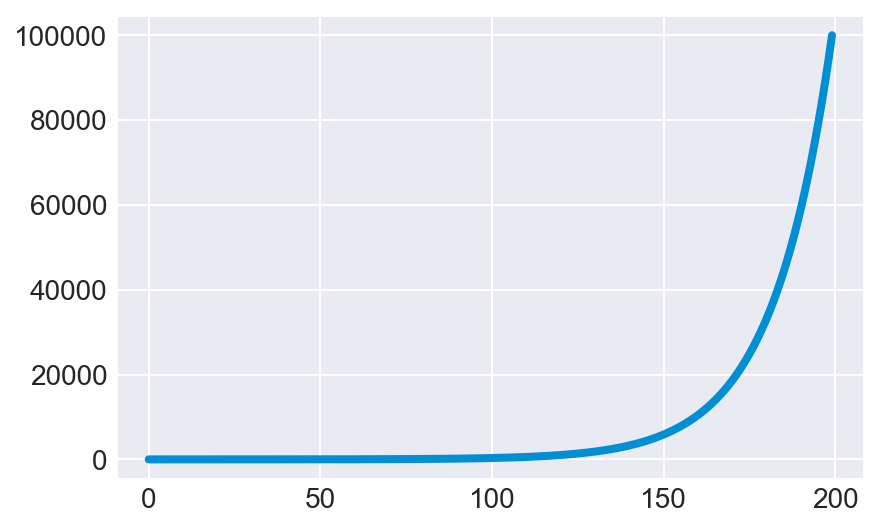

In [56]:
sns.set_style("darkgrid")
plt.plot(ridge_alphas);

In [57]:
# optimizing hyperparameter for lasso
optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1) # setting high value to ensure we dont miss any values, 
                                                       
optimal_lasso.fit(X_train_scaled, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.003186317538684021


In [58]:
#  optimizing both hyperparameters (alpha and l1 ratio) for enet model
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = 0.5
optimal_enet = ElasticNetCV(n_alphas=200, l1_ratio=enet_ratio, cv=5, verbose =1)

optimal_enet.fit(X_train_scaled, y_train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.008034777206089775
0.5


..[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


#### Model initialization

In [59]:
ridge_model = Ridge(alpha=optimal_ridge.alpha_)

In [60]:
lasso_model = Lasso(alpha=optimal_lasso.alpha_)

In [60]:
enet_model = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

#### Model Evaluation

1) Calculate cross-val-score for each of the models (vanilla LR, Ridge, Lasso and Elastic net.<br>
2) Fit the respective models with train, predict y-hat and calculate R2 & RSME score for each model. 

In [61]:
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean()

print(lr_scores)
print (np.mean(lr_scores))

-4.839484413411278e+24
-4.839484413411278e+24


In [62]:
ridge_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=10)

print(ridge_scores)
print (np.mean(ridge_scores))

[0.85105075 0.91405061 0.91644507 0.92177394 0.9094256  0.8782321
 0.9266166  0.92458834 0.92768668 0.92013284]
0.9090002520106975


In [63]:
lasso_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.84846799 0.90970066 0.91725377 0.92823174 0.90680343 0.87690673
 0.94309951 0.93249379 0.92896622 0.92786647]
0.9119790304495238


In [64]:
enet_scores = cross_val_score(enet_model, X_train_scaled, y_train, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[0.84740259 0.90964238 0.91558919 0.92826661 0.90635881 0.87711388
 0.94441975 0.93140077 0.92816961 0.92887574]
0.9117239319583484


In [65]:
# fit lasso model with training set for future prediction as well to obtain Beta coefficients to understand the performance better. 
lasso_model.fit(X_train_scaled, y_train)
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso_model.coef_,
                            'abs_coef':np.abs(lasso_model.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

variable      coef  abs_coef
16            gr_liv_area  0.128550  0.128550
2            overall_qual  0.089375  0.089375
4              year_built  0.052060  0.052060
12          total_bsmt_sf  0.044098  0.044098
3            overall_cond  0.042330  0.042330
1                lot_area  0.028774  0.028774
25             functional  0.026709  0.026709
17         bsmt_full_bath  0.021336  0.021336
175    bsmtfin_type_1_Unf -0.018852  0.018852
26             fireplaces  0.016671  0.016671
34            paved_drive  0.015980  0.015980
11          bsmt_exposure  0.015910  0.015910
13             heating_qc  0.015790  0.015790
44      ms_zoning_C (all) -0.014943  0.014943
5          year_remod/add  0.013942  0.013942
39           screen_porch  0.013799  0.013799
74   neighborhood_GrnHill  0.013752  0.013752
23           kitchen_qual  0.013734  0.013734
70   neighborhood_Crawfor  0.013709  0.013709
49           ms_zoning_RM -0.012877  0.012877

Lasso picked 89 features and eliminated the other 112 features


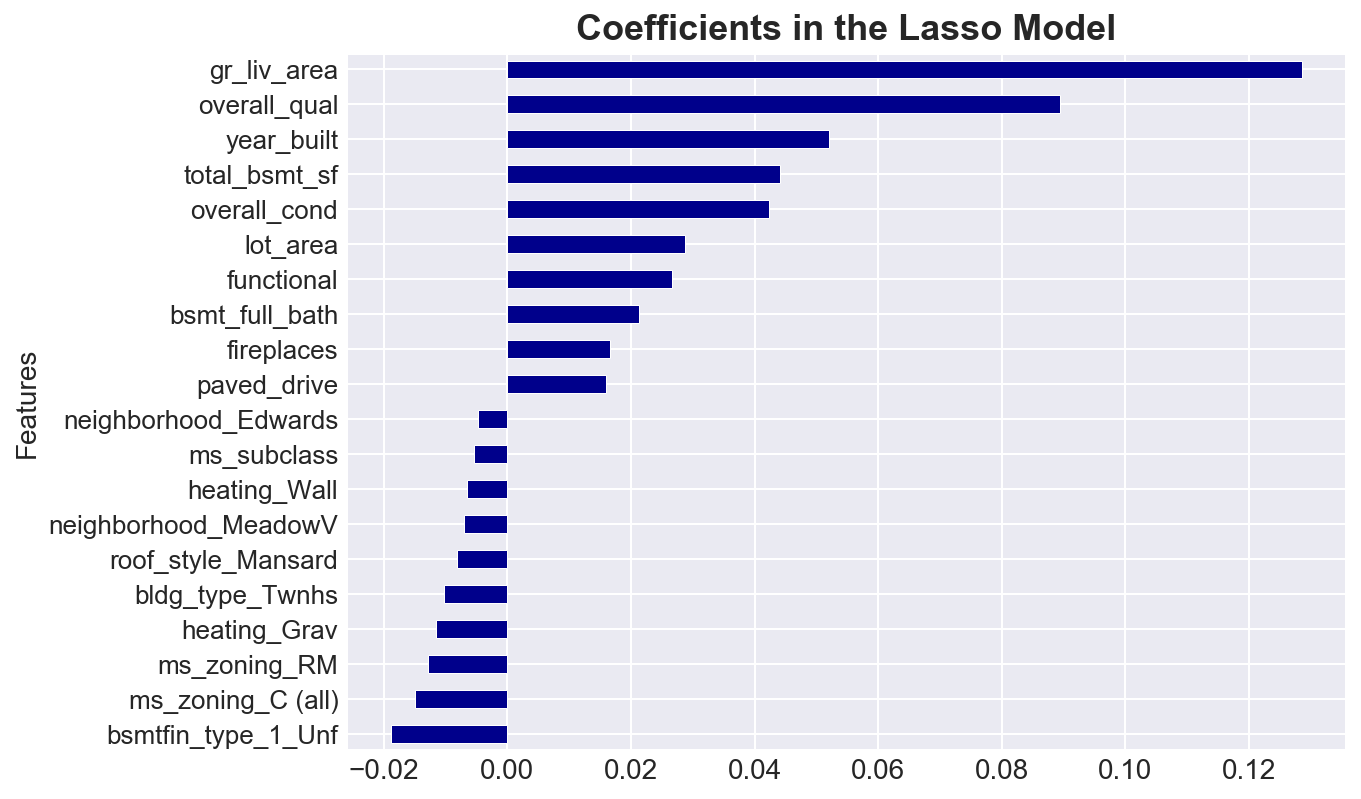

In [66]:
# plotting the above coefficients for easier visualization
plt.figure(figsize = (8,6))
coefs = pd.Series(lasso_model.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color = 'darkblue')
plt.ylabel('Features', size = 14)

ax = plt.gca()
ax.tick_params(axis = 'y', labelsize = 13)
plt.title("Coefficients in the Lasso Model", size = 18,weight = 'bold')

plt.show()

In [67]:
print ('Percent variables zeroed out:', np.sum((lasso_model.coef_ == 0))/float(X_train.shape[1]))

Percent variables zeroed out: 0.5572139303482587


#### Predicting y-hat for each model to calculate R squared & RMSE

In [68]:
predictions_lr = lr.predict(X_test_scaled)
r2_lr = metrics.r2_score(y_test, predictions_lr)
rmse_lr = (metrics.mean_squared_error(y_test, predictions_lr))**0.5
print ("R^2 Score: ", r2_lr)
print ("RMSE Score: ", rmse_lr)

R^2 Score:  -845069952923141.5
RMSE Score:  11076079.231088703


In [69]:
ridge_model.fit(X_train_scaled, y_train)
predictions_ridge = ridge_model.predict(X_test_scaled)
r2_ridge = metrics.r2_score(y_test, predictions_ridge)
rmse_ridge = (metrics.mean_squared_error(y_test, predictions_ridge))**0.5
print ("R^2 Score: ", r2_ridge)
print ("RMSE Score: ", rmse_ridge)

R^2 Score:  0.9268952978380715
RMSE Score:  0.10301782575346413


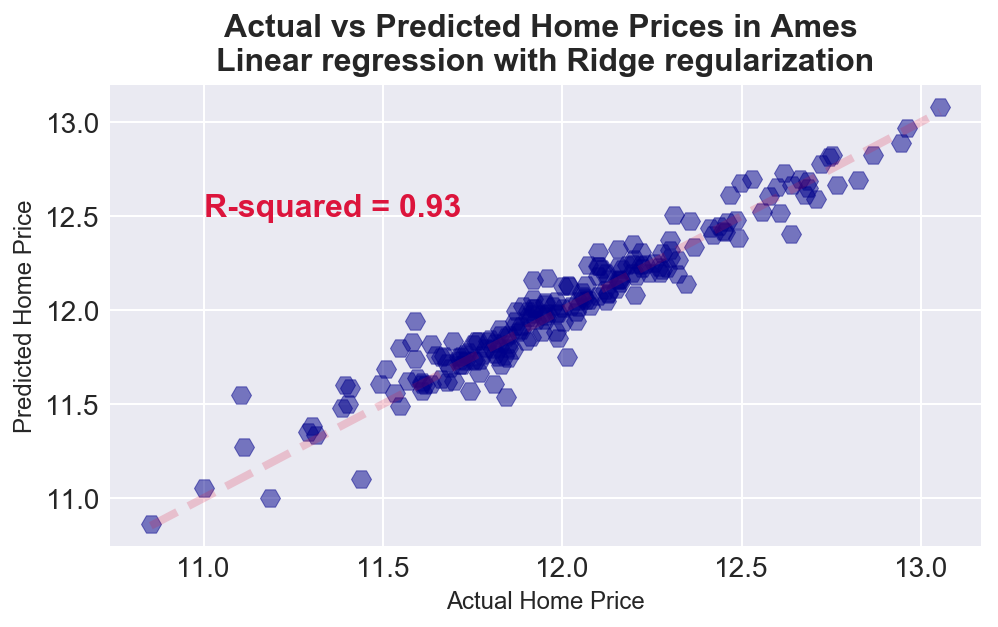

In [70]:
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(y_test, predictions_ridge, color ='darkblue', alpha = 0.5, marker = 'H',s=100)
ax.set_xlabel('Actual Home Price', size = 12)
ax.set_ylabel('Predicted Home Price', size = 12)
ax.set_title('Actual vs Predicted Home Prices in Ames \nLinear regression with Ridge regularization', size = 16,weight = 'bold')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'--', color = 'crimson',alpha=0.2);
ax.text(11, 12.5, 'R-squared = %0.2f' % r2_ridge, color = 'crimson', fontsize = 16, weight = 'bold')
plt.show()

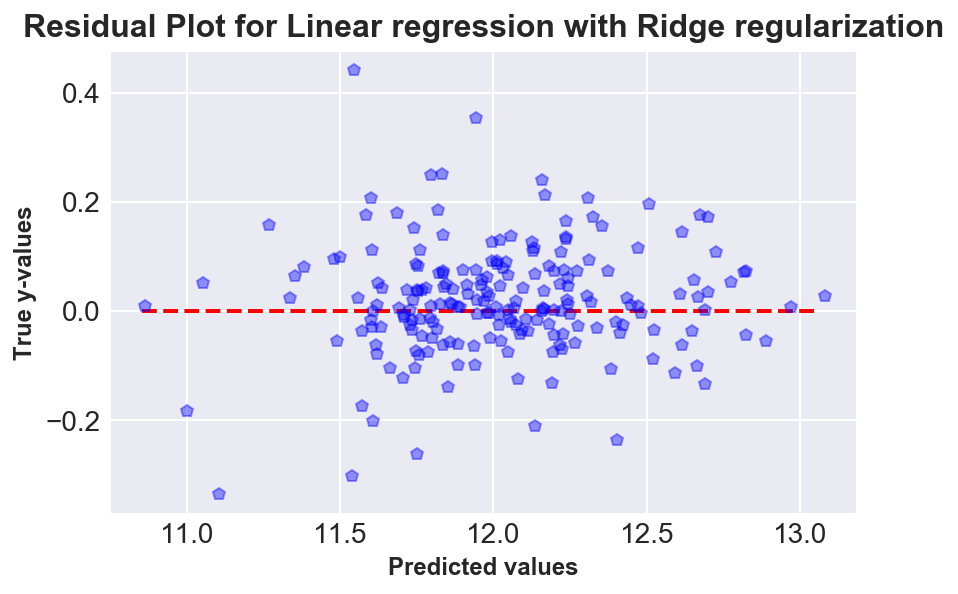

In [71]:
residual_ridge = predictions_ridge - y_test
fig, ax = plt.subplots()
ax.plot(predictions_ridge, residual_ridge, 'p', alpha=0.4, color = 'blue');
ax.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyle = '--', linewidth = 2.0)
ax.set_title('Residual Plot for Linear regression with Ridge regularization', size = 16, weight = 'bold');
ax.set_xlabel('Predicted values', size = 12, weight = 'bold');
ax.set_ylabel('Residuals', size = 12, weight = 'bold');

In [72]:
predictions_lasso = lasso_model.predict(X_test_scaled)
r2_lasso = metrics.r2_score(y_test, predictions_lasso)
rmse_lasso = (metrics.mean_squared_error(y_test, predictions_lasso))**0.5
print ("R^2 Score: ",r2_lasso )
print ("RMSE Score: ", rmse_lasso)

R^2 Score:  0.9323747528309747
RMSE Score:  0.09908186127546889


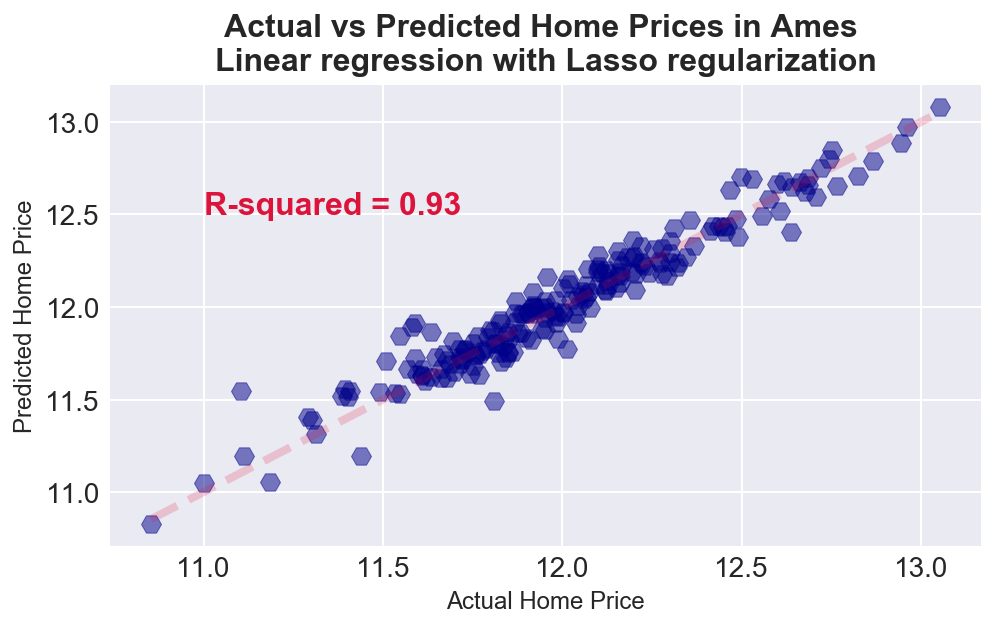

In [73]:
fig, ax = plt.subplots(figsize = (7,4))

ax.scatter(y_test, predictions_lasso, color ='darkblue', alpha = 0.5, marker = 'H',s=100)
ax.set_xlabel('Actual Home Price', size = 12)
ax.set_ylabel('Predicted Home Price', size = 12)
ax.set_title('Actual vs Predicted Home Prices in Ames \nLinear regression with Lasso regularization', size = 16,weight = 'bold')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'--', color = 'crimson',alpha=0.2);
ax.text(11, 12.5, 'R-squared = %0.2f' % r2_lasso, color = 'crimson', fontsize = 16, weight = 'bold')
plt.show()

In [1]:
residual_lasso = predictions_lasso - y_test
fig, ax = plt.subplots()
ax.plot(predictions_lasso, residual_lasso, 'p', alpha=0.4, color = 'blue');
ax.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyle = '--', linewidth = 2.0)
ax.set_title('Residual Plot for Linear regression with Lasso regularization', size = 16, weight = 'bold');
ax.set_xlabel('Predicted values', size = 12, weight = 'bold');
ax.set_ylabel('Residuals', size = 12, weight = 'bold');

NameError: name 'predictions_lasso' is not defined

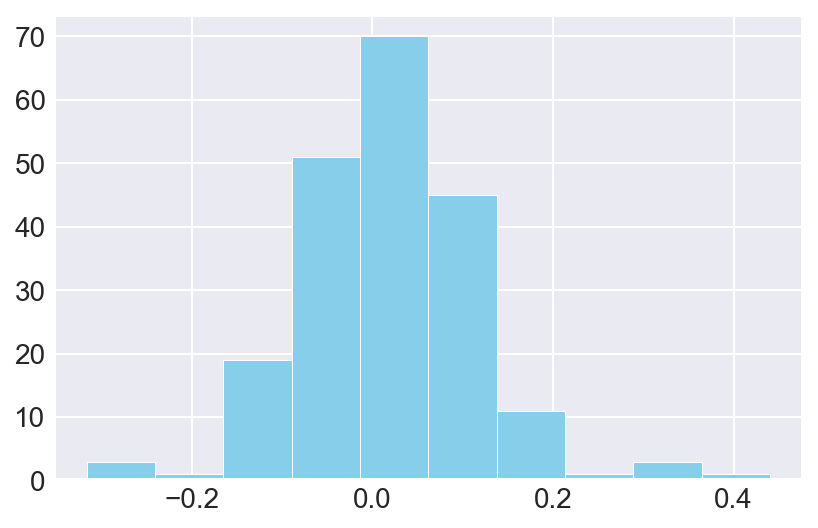

In [75]:
# plotting a histogram to see the distribution of residuals from lasso model
residual_lasso.hist(color= 'skyblue');

In [76]:
enet_model.fit(X_train_scaled, y_train)
predictions_enet = enet_model.predict(X_test_scaled)
r2_enet = metrics.r2_score(y_test, predictions_enet)
rmse_enet = (metrics.mean_squared_error(y_test, predictions_enet))**0.5
print ("R^2 Score: ", r2_enet)
print ("RMSE Score: ", rmse_enet)

R^2 Score:  0.9318363256889768
RMSE Score:  0.09947552042900364


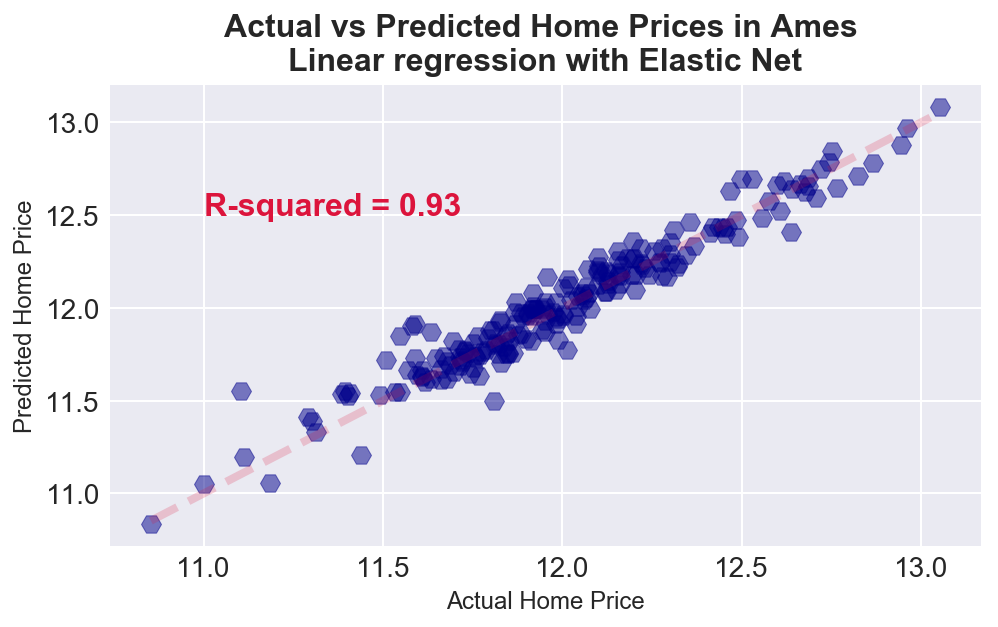

In [77]:
fig, ax = plt.subplots(figsize = (7,4))

ax.scatter(y_test, predictions_enet, color ='darkblue', alpha = 0.5, marker = 'H',s=100)
ax.set_xlabel('Actual Home Price', size = 12)
ax.set_ylabel('Predicted Home Price', size = 12)
ax.set_title('Actual vs Predicted Home Prices in Ames \nLinear regression with Elastic Net', size = 16, weight = 'bold')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'--', color = 'crimson',alpha=0.2);
ax.text(11, 12.5, 'R-squared = %0.2f' % r2_enet, color = 'crimson', fontsize = 16, weight = 'bold')
plt.show()

Text(0, 0.5, 'True y-values')

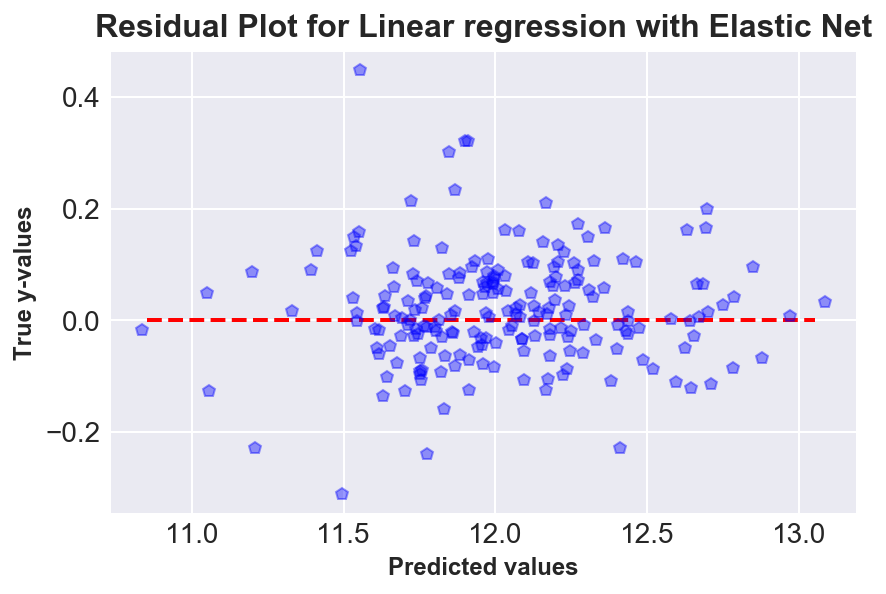

In [78]:
residual_enet = predictions_enet - y_test
fig, ax = plt.subplots()
ax.plot(predictions_enet, residual_enet, 'p', alpha=0.4, color = 'blue');
ax.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyle = '--', linewidth = 2.0)
ax.set_title('Residual Plot for Linear regression with Elastic Net', size = 16, weight = 'bold');
ax.set_xlabel('Predicted values', size = 12, weight = 'bold')
ax.set_ylabel('Residuals', size = 12, weight = 'bold')

In [79]:
test_predict= test_final.drop(['id'], axis=1)
test_scaled = ss.transform(test_predict)
results_lasso = lasso_model.predict(test_scaled)
# to reverse the log transformation done to sale price for normalization
# rounding the results to 4 decimal places as suggested in the submission csv file
results_lasso = np.round(np.exp(results_lasso),4) 
test_final = test_final.rename({'id': 'Id'})


### Inferential Visualizations & Interpretation (above)

***The model selected (Lasso) certainly looks very strong R2 score of the selected model is 0.93 on unseen data:<br>*** 
    ***1) There are very few poor predictions, and no real outliers are seen.<br>***
    ***2) There is no evidence of overfitting, as the training score is lower than the test score, around 0.91.<br>*** 
    ***3) It is also notable the relative equality of error variance across sale prices. This property of equal error variance is termed homoscedasticity, and it is important here, because homoscedasticity of errors is one of the fundamental assumptions necessary for linear regression to be unbiased.<br>*** 

In [80]:
# preparing dataframe for submission with just 2 columns are required by kaggle
sub = pd.DataFrame({'Id':test_final['id'], 'SalePrice': results_lasso})

In [81]:
# writing to file that is to be submitted to kaggle. 
sub.to_csv('datasets/submission_lasso.csv', index = False)

### Trying out simple feature selection to see variance in scores

In [82]:
# to display lasso generated beta coefficient values to perform feature selection
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso_model.coef_,
                            'abs_coef':np.abs(lasso_model.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

variable      coef  abs_coef
16            gr_liv_area  0.128550  0.128550
2            overall_qual  0.089375  0.089375
4              year_built  0.052060  0.052060
12          total_bsmt_sf  0.044098  0.044098
3            overall_cond  0.042330  0.042330
1                lot_area  0.028774  0.028774
25             functional  0.026709  0.026709
17         bsmt_full_bath  0.021336  0.021336
175    bsmtfin_type_1_Unf -0.018852  0.018852
26             fireplaces  0.016671  0.016671
34            paved_drive  0.015980  0.015980
11          bsmt_exposure  0.015910  0.015910
13             heating_qc  0.015790  0.015790
44      ms_zoning_C (all) -0.014943  0.014943
5          year_remod/add  0.013942  0.013942
39           screen_porch  0.013799  0.013799
74   neighborhood_GrnHill  0.013752  0.013752
23           kitchen_qual  0.013734  0.013734
70   neighborhood_Crawfor  0.013709  0.013709
49           ms_zoning_RM -0.012877  0.012877

In [83]:
# selecting the top features and checking for the collienarity before fitting into lenear regression model
features = ['gr_liv_area','overall_qual','year_built','total_bsmt_sf','overall_cond','lot_area']
predictor = ['saleprice']
X[features].corr()

gr_liv_area  overall_qual  year_built  total_bsmt_sf  \
gr_liv_area       1.000000      0.565140    0.258062       0.409642   
overall_qual      0.565140      1.000000    0.602455       0.553102   
year_built        0.258062      0.602455    1.000000       0.421341   
total_bsmt_sf     0.409642      0.553102    0.421341       1.000000   
overall_cond     -0.110020     -0.081565   -0.370612      -0.163740   
lot_area          0.346691      0.110536    0.043608       0.265571   

               overall_cond  lot_area  
gr_liv_area       -0.110020  0.346691  
overall_qual      -0.081565  0.110536  
year_built        -0.370612  0.043608  
total_bsmt_sf     -0.163740  0.265571  
overall_cond       1.000000 -0.033875  
lot_area          -0.033875  1.000000

In [84]:
train_final[features]

gr_liv_area  overall_qual  year_built  total_bsmt_sf  overall_cond  \
0            1479             6        1976          725.0             8   
1            2122             7        1996          913.0             5   
2            1057             5        1953         1057.0             7   
3            1444             5        2006          384.0             5   
4            1445             6        1900          676.0             8   
...           ...           ...         ...            ...           ...   
2042         1728             8        2007         1884.0             5   
2043          861             4        1940          861.0             5   
2044         1913             6        1928          896.0             6   
2045         1200             4        1956         1200.0             5   
2046         1804             7        1999          994.0             5   

      lot_area  
0        13517  
1        11492  
2         7922  
3         9802  
4        14235  
...        ...  
2042     11449  
2043     12342  
2044      7558  
2045     10400  
2046      7500  

[2047 rows x 6 columns]

In [85]:
X = train_final[features]
y = train_final[predictor]
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size = 0.9 ,random_state = 42)
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [86]:
lr= LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_score = cross_val_score(lr, X_train_scaled, y_train, cv=10)
print(lr_score.mean())
lr_pred = lr.predict(X_test_scaled)
lr_r2 = metrics.r2_score(y_test, lr_pred)
print(lr_r2)

0.870981094408212
0.8792488903108869


In [87]:
r_alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(r_alphas, cv = 10)
ridge.fit(X_train_scaled, y_train)
ridge_score = cross_val_score(ridge,X_train_scaled, y_train, cv=10)
print(ridge_score.mean())
r_pred = ridge.predict(X_test_scaled)
rs = metrics.r2_score(y_test, r_pred)
print(rs)

0.8710068490642401
0.8798031809277859


In [88]:
lasso = LassoCV(n_alphas= 200, cv = 10, verbose =1)
lasso.fit(X_train_scaled, y_train)
lasso_score = cross_val_score(lasso,X_train_scaled, y_train, cv=10)
print(lasso_score.mean())
l_pred = lasso.predict(X_test_scaled)
ls = metrics.r2_score(y_test, l_pred)
print(ls)

/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.8709941331213289
0.8793633135947694


...................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


In [89]:
l1_ratio = 0.5
enet_model = ElasticNetCV(n_alphas=200, l1_ratio=l1_ratio, cv=5, verbose =1)
enet_model = enet_model.fit(X_train_scaled, y_train)
enet_score = cross_val_score(enet_model,X_train_scaled, y_train, cv=10)
print(enet_score.mean())
e_pred = enet_model.predict(X_test_scaled)
es = metrics.r2_score(y_test, e_pred)
print(es)

/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.8709900729478308
0.879382119642543


The scores for models where manual feature selection was employed returned lower r squared in comparison to non-feature selected models.

## Conclusions and Recommendations

**1) The importance of data cleaning and removing outliers cannot be stressed enough. It helped improve the R2 score by over 10%. Even though it is time consuming and rather dirty, the performance enhancement it brings to the accuracy/ scoring of the model is worth every bit of cleaning.<br>**

**2) The model shows strong R Squared score and is certainly a strong prediction model. Linear regression may be a basic prediction model, but prediction is not the only output of it. It helps much with inferential learning showing what factors influence the selling price of a house. This may well be more valuable than the predictions themselves.<br>**

**3) Addressed problem statement by developing a relatively accurate model to predict housing prices based on various features<br>**
    *- Top 3 features that can fetch higher sale price : Bigger houses, Well renovated (or good quality) houses and  Newer houses*<br>
    *- Features that ma hurt the sale price : Unfinished basement, Houses located in commercial zone and Townhouses*
 
**4) A lot more can be done to analyse the relationship between features like age of the property, year sold, style of the house etc. that may lead to next level of feature engineering.<br>**